In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import logging
import pandas as pd
import common
import config
import seaborn as sns
import matplotlib.pyplot as plt
import model_graphics

logging.basicConfig(level=logging.DEBUG)
root_logger = logging.getLogger()
root_logger.setLevel(logging.DEBUG)

### Get shodan and votes dataframes

In [33]:
datestr = "2024-06-26"

manager = common.DatasetManager(config.TLHOP_EPSS_REPORT_PATH)
manager.load_datasets([datestr])

votes_df = manager.votes_df.copy()
manager.join_votes_shodan_df(votes_df, datestr)

features_df = manager.build_features_df(votes_df)
shodan_full_df = manager.datestr2df[datestr]

INFO:root:Selected 2 of 2 commits, start=2024-05-02 end=2024-06-26


INFO:root:Loaded classifications for 43754 orgs
INFO:root:Loaded classifications for 247311 CVEs
INFO:root:KEV database has 1222 CVEs
/home/thiagohbs/network-security/xgboost-ranking/common.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql(query, connection)
INFO:root:Read table users from PostgreSQL, 8 rows
INFO:root:Read table votes from PostgreSQL, 1686 rows
INFO:root:Loaded 1686 votes from 8 users
INFO:root:Merged Shodan columns
INFO:root:Joined CVE columns
INFO:root:Merged organization features


### Changing vote_date format

In [34]:
votes_df['vote_date'] = votes_df['vote_date'].astype(str).str[:10]

### Reorganize the votes table, rename the users nicknames to their names and create a correlation matrix between them

In [35]:
matriz = votes_df.pivot_table(
    index='meta_id',
    columns='username',
    values='vote'
)

rename_users = {
    'chicoin' : 'Francisco',
    'cunha' : 'Italo',
    'pep' : 'Pedro',
    'leoomaia' : 'Leonardo',
    'thelegendofgab' : 'Gabriel',
    'thiagohbs' : 'Thiago'
}

matriz_renamed = matriz.rename(columns=rename_users)
matriz_notnull = matriz_renamed.dropna()
correlation_null = matriz_notnull.corr(method='pearson')

### Creates a heatmap graph with the generated correlation
### The closer to 1, the more correlated the votes are

/home/thiagohbs/.local/lib/python3.11/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f7faac9cc10>


DEBUG:matplotlib.backends.backend_pdf:Assigning font /F1 = '/usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG:matplotlib.backends.backend_pdf:Embedding font /usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writing TrueType font.


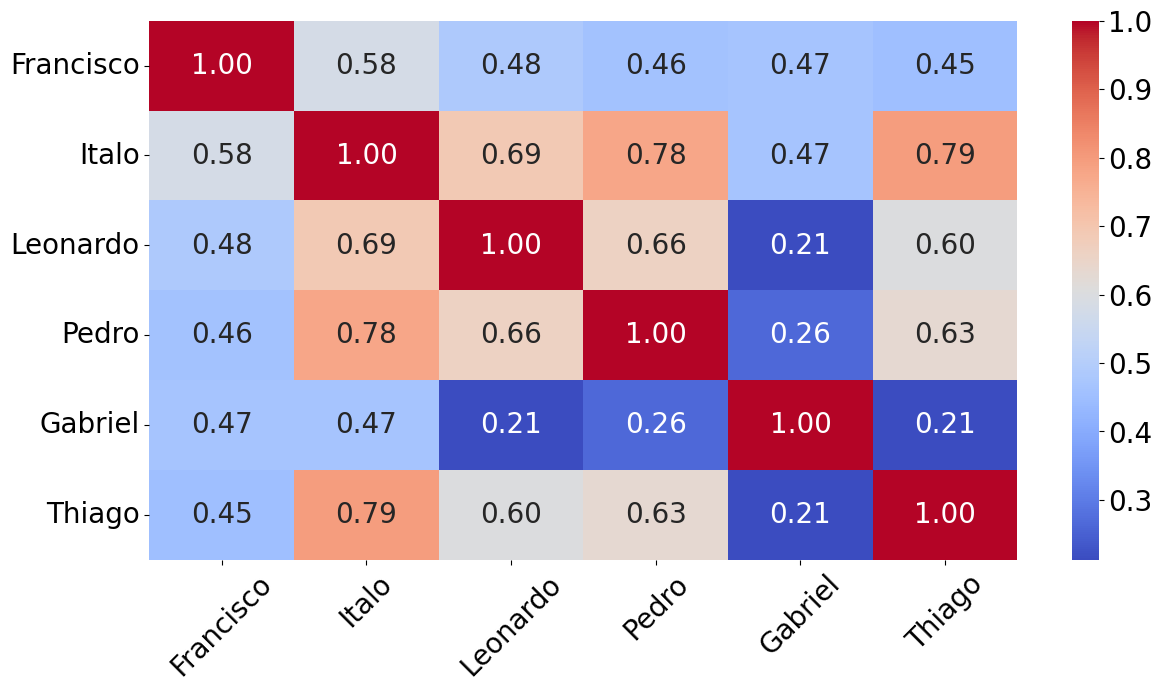

In [36]:
graphic = model_graphics.Graphics()
graphic.heatmap(correlation_null)